<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Repositories" data-toc-modified-id="Repositories-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Repositories</a></span></li><li><span><a href="#Status" data-toc-modified-id="Status-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Status</a></span></li><li><span><a href="#Repositories" data-toc-modified-id="Repositories-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Repositories</a></span><ul class="toc-item"><li><span><a href="#Remove-repositories-that-we-lost-access-without-a-backup" data-toc-modified-id="Remove-repositories-that-we-lost-access-without-a-backup-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Remove repositories that we lost access without a backup</a></span><ul class="toc-item"><li><span><a href="#Repositories-with-no-notebooks" data-toc-modified-id="Repositories-with-no-notebooks-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Repositories with no notebooks</a></span></li><li><span><a href="#Valid-repositories" data-toc-modified-id="Valid-repositories-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Valid repositories</a></span></li></ul></li><li><span><a href="#Notebook-count" data-toc-modified-id="Notebook-count-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Notebook count</a></span></li><li><span><a href="#Repository-count" data-toc-modified-id="Repository-count-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Repository count</a></span><ul class="toc-item"><li><span><a href="#Repositories-with-only-1-notebook" data-toc-modified-id="Repositories-with-only-1-notebook-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Repositories with only 1 notebook</a></span></li><li><span><a href="#Repositories-with-only-2-notebook" data-toc-modified-id="Repositories-with-only-2-notebook-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Repositories with only 2 notebook</a></span></li><li><span><a href="#Repositories-with-10-or-more-notebooks" data-toc-modified-id="Repositories-with-10-or-more-notebooks-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Repositories with 10 or more notebooks</a></span></li><li><span><a href="#Notebooks-that-belong-to-repositories-with-10-or-more-notebooks" data-toc-modified-id="Notebooks-that-belong-to-repositories-with-10-or-more-notebooks-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Notebooks that belong to repositories with 10 or more notebooks</a></span></li></ul></li><li><span><a href="#Repositories-with-requirements.txt-or-setup.py" data-toc-modified-id="Repositories-with-requirements.txt-or-setup.py-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Repositories with requirements.txt or setup.py</a></span></li><li><span><a href="#Notebooks-in-repositories-with-requirements.py-or-setup.py-or-Pipfile" data-toc-modified-id="Notebooks-in-repositories-with-requirements.py-or-setup.py-or-Pipfile-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Notebooks in repositories with requirements.py or setup.py or Pipfile</a></span></li></ul></li></ul></div>

# Repositories

Analyze repositories: number of notebooks/repository, and repoositories with dependency files (setup.py, requirements.txt, Pipfile)

In [1]:
import sys

sys.path.insert(0, "../archaeology")
sys.path.insert(0, "../analysis")

import importlib

import pandas as pd
from consts import R_STATUSES
from db import connect
from IPython.display import display
from matplotlib import pyplot as plt
from matplotlib.ticker import NullLocator
from matplotlib_venn import venn2, venn3

import analysis_helpers

importlib.reload(analysis_helpers)
from analysis_helpers import (describe_processed, distribution_with_boxplot,
                              relative_var, savefig, var)

%matplotlib inline

In [2]:
with connect() as session:
    # print('Last query:', session.query(Query).all()[-1])
    repositories = pd.read_sql_table("repositories", session.connection())

# Status

In [3]:
series = repositories.groupby("processed").size()
# series
# series.plot(kind="bar")

,0
notebooks and cells - ok,5240
requirements - ok,5240
extracted files,5240
compress - ok,2843
unavailable files,1


<AxesSubplot:>

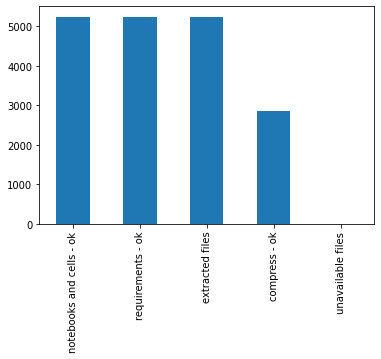

In [4]:
described = describe_processed(series, R_STATUSES, True)
display(described.to_frame())
described.plot(kind="bar")

# Repositories

## Remove repositories that we lost access without a backup

In [5]:
repositories = repositories[(repositories["processed"] & 1024 == 0)]  # failed to clone

### Repositories with no notebooks
They matched the query 'language:"Jupyter Notebook"', but they did not have a notebook.
Or they had only in checkpoint folders

In [6]:
len(repositories[repositories["notebooks_count"] == 0])

2580

### Valid repositories

In [7]:
repositories = repositories[repositories["notebooks_count"] > 0]
print("Repositories: {}".format(var("repositories", len(repositories), "{:,}")))

Repositories: 2,660


In [8]:
repositories.head(5)

,id,article_id,domain,repository,hash_dir1,hash_dir2,commit,notebooks_count,setups_count,requirements_count,notebooks,setups,requirements,processed,pipfiles_count,pipfile_locks_count,pipfiles,pipfile_locks
2,3,1,github.com,ncbi/elastic-blast-demos,db,e656ffaf821bc27abe9b352690487f7eb8085e,3dbc7a3c5a42cd092e4921beffa8250b523cf0e5,1,0,1,elastic-blast-rdrp.ipynb,,requirements.txt,8321,0,0,,
5,6,3,github.com,drorlab/pensa,f2,2dc35bf663a70ccb2e205488d23561a161c05d,31beb6c005302ca6cdabed2921138c2a67388b66,1,1,1,tutorial/PENSA_Tutorial_GPCRmd_MOR.ipynb,setup.py,docs/requirements.txt,8321,0,0,,
7,8,5,github.com,predictive-clinical-neuroscience/braincharts,f2,2614f9a4c5bd780af3275392d5f1d95dba8c16,1b0967244ac1af6ff1127831ffc733fe92661a9f,5,0,0,scripts/apply_normative_models_sa.ipynb;script...,,,8321,0,0,,
8,9,5,github.com,saigerutherford/evidence_embracing_nm,53,1484bbcc98527222a4d3ca3057302e247bc0bb,81a1a1622f3bf1e96c0299b14e5301e05daf7c64,5,0,0,EvaluationFigures.ipynb;svm_groupdiff_ct_yeo.i...,,,8321,0,0,,
9,10,6,github.com,draeger-lab/pymCADRE,bc,115432e1ab35f6eaa726a0d6b172a4129a4d87,13b3dc9c04804a6d9e01d5fce2bbcce05a303456,8,1,0,PREDICATE.ipynb;pymCADRE_code/code/main_pymcad...,setup.py,,8321,0,0,,


## Notebook count

In [9]:
total_notebooks = repositories["notebooks_count"].sum()
"{:,}".format(total_notebooks)

'27,271'

Distribution(min=1, q1=1.0, median=3.5, q3=9.0, max=1928)


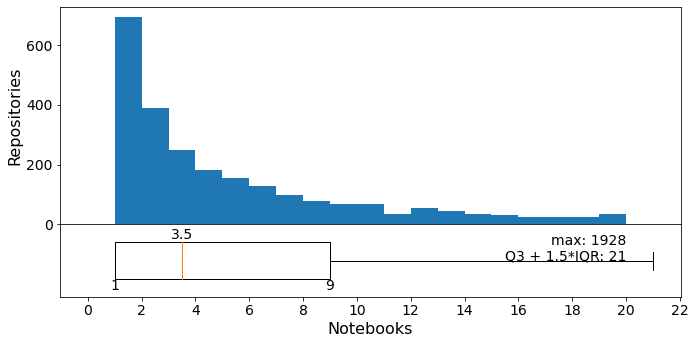

In [10]:
column = repositories["notebooks_count"]
with savefig("notebooks_count", 9, 5):
    distribution = distribution_with_boxplot(
        column, 0, 20, 2, "Repositories", "Notebooks", True
    )
    print(distribution)

## Repository count

In [11]:
total = len(repositories)
total

2660

### Repositories with only 1 notebook

In [12]:
relative_var(
    "repositories_1_notebook",
    len(repositories[repositories["notebooks_count"] == 1]),
    total,
)

'692 (26.02%)'

### Repositories with only 2 notebook

In [13]:
relative_var(
    "repositories_2_notebooks",
    len(repositories[repositories["notebooks_count"] <= 2]),
    total,
)

'1,082 (40.68%)'

### Repositories with 10 or more notebooks

In [14]:
repo_10_plus = repositories[repositories["notebooks_count"] >= 10]
relative_var(
    "repositories_10_notebooks",
    len(repo_10_plus),
    total,
)

'618 (23.23%)'

### Notebooks that belong to repositories with 10 or more notebooks

In [15]:
notebooks_in_repo_10_plus = repo_10_plus["notebooks_count"].sum()
relative_var(
    "notebooks_from_repositories_10",
    notebooks_in_repo_10_plus,
    total_notebooks,
)

'20,838 (76.41%)'

## Repositories with requirements.txt or setup.py

In [16]:
fn = lambda x: len(x)

setup_and_requirements_and_pipfile = fn(
    repositories[
        (repositories["setups_count"] > 0)
        & (repositories["requirements_count"] > 0)
        & (
            (repositories["pipfiles_count"] > 0)
            | (repositories["pipfile_locks_count"] > 0)
        )
    ]
)
setup_and_requirements = fn(
    repositories[
        (repositories["setups_count"] > 0)
        & (repositories["requirements_count"] > 0)
        & ~(
            (repositories["pipfiles_count"] > 0)
            | (repositories["pipfile_locks_count"] > 0)
        )
    ]
)
setup_and_pipfile = fn(
    repositories[
        (repositories["setups_count"] > 0)
        & ~(repositories["requirements_count"] > 0)
        & (
            (repositories["pipfiles_count"] > 0)
            | (repositories["pipfile_locks_count"] > 0)
        )
    ]
)
requirements_and_pipfile = fn(
    repositories[
        ~(repositories["setups_count"] > 0)
        & (repositories["requirements_count"] > 0)
        & (
            (repositories["pipfiles_count"] > 0)
            | (repositories["pipfile_locks_count"] > 0)
        )
    ]
)
setup = fn(
    repositories[
        (repositories["setups_count"] > 0)
        & ~(repositories["requirements_count"] > 0)
        & ~(
            (repositories["pipfiles_count"] > 0)
            | (repositories["pipfile_locks_count"] > 0)
        )
    ]
)
requirements = fn(
    repositories[
        ~(repositories["setups_count"] > 0)
        & (repositories["requirements_count"] > 0)
        & ~(
            (repositories["pipfiles_count"] > 0)
            | (repositories["pipfile_locks_count"] > 0)
        )
    ]
)
pipfiles = fn(
    repositories[
        ~(repositories["setups_count"] > 0)
        & ~(repositories["requirements_count"] > 0)
        & (
            (repositories["pipfiles_count"] > 0)
            | (repositories["pipfile_locks_count"] > 0)
        )
    ]
)
others = fn(
    repositories[
        ~(repositories["setups_count"] > 0)
        & ~(repositories["requirements_count"] > 0)
        & ~(
            (repositories["pipfiles_count"] > 0)
            | (repositories["pipfile_locks_count"] > 0)
        )
    ]
)

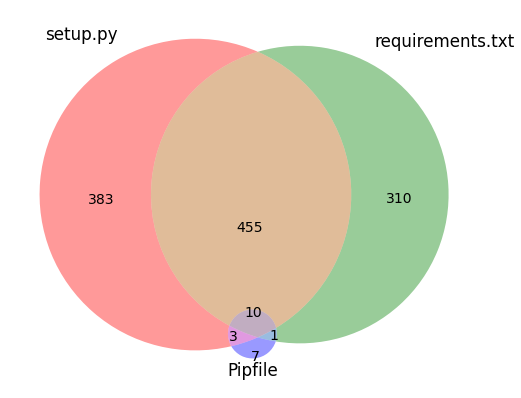

In [17]:
with savefig("repository_dependencies_x3", 8, 6):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    venn = venn3(
        subsets={
            "111": setup_and_requirements_and_pipfile,
            "110": setup_and_requirements,
            "101": setup_and_pipfile,
            "100": setup,
            "011": requirements_and_pipfile,
            "010": requirements,
            "001": pipfiles,
        },
        set_labels=("setup.py", "requirements.txt", "Pipfile"),
        ax=ax,
    )
    for label in venn.subset_labels:
        label.set_text("{0:,g}".format(int(label.get_text())))
    # ax.text(0, 0.6, "{0:,g}".format(others))
    plt.tight_layout()
    plt.plot()

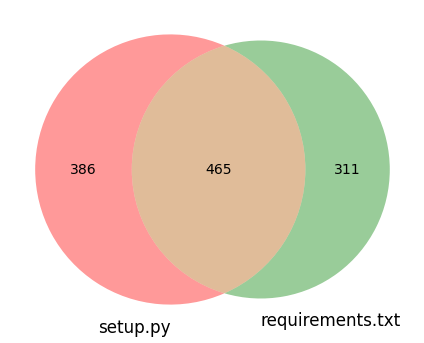

In [18]:
with savefig("repository_dependencies_x2", 8, 6):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    venn = venn2(
        subsets={
            "11": setup_and_requirements + setup_and_requirements_and_pipfile,
            "10": setup + setup_and_pipfile,
            "01": requirements + requirements_and_pipfile,
        },
        set_labels=("setup.py", "requirements.txt"),
        ax=ax,
    )
    for label in venn.subset_labels:
        label.set_text("{0:,g}".format(int(label.get_text())))
    # ax.text(0, 0.55, "{0:,g}".format(others + pipfiles))
    ax.set_axis_off()
    # plt.subplots_adjust(top = 0.9, bottom = 0, right = 1, left = 0,
    #        hspace = 0, wspace = 0)
    ax.margins(0, 0)
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())
    plt.plot()

In [19]:
pipfile_total = (
    setup_and_requirements_and_pipfile
    + setup_and_pipfile
    + requirements_and_pipfile
    + pipfiles
)
dependencies = (
    setup_and_requirements_and_pipfile
    + setup_and_requirements
    + setup_and_pipfile
    + setup
    + requirements_and_pipfile
    + requirements
    + pipfiles
)

print(
    "Repositories with Pipfile: {}".format(
        relative_var("repositories_with_pipfile", pipfile_total, len(repositories))
    )
)
print(
    "Repositories with Declared Modules: {}".format(
        relative_var(
            "repositories_with_dependencies", dependencies, dependencies + others
        )
    )
)

Repositories with Pipfile: 21 (0.79%)
Repositories with Declared Modules: 1,169 (43.95%)


## Notebooks in repositories with requirements.py or setup.py or Pipfile

In [20]:
fn = lambda x: x["notebooks_count"].sum()

setup_and_requirements_and_pipfile = fn(
    repositories[
        (repositories["setups_count"] > 0)
        & (repositories["requirements_count"] > 0)
        & (
            (repositories["pipfiles_count"] > 0)
            | (repositories["pipfile_locks_count"] > 0)
        )
    ]
)
setup_and_requirements = fn(
    repositories[
        (repositories["setups_count"] > 0)
        & (repositories["requirements_count"] > 0)
        & ~(
            (repositories["pipfiles_count"] > 0)
            | (repositories["pipfile_locks_count"] > 0)
        )
    ]
)
setup_and_pipfile = fn(
    repositories[
        (repositories["setups_count"] > 0)
        & ~(repositories["requirements_count"] > 0)
        & (
            (repositories["pipfiles_count"] > 0)
            | (repositories["pipfile_locks_count"] > 0)
        )
    ]
)
requirements_and_pipfile = fn(
    repositories[
        ~(repositories["setups_count"] > 0)
        & (repositories["requirements_count"] > 0)
        & (
            (repositories["pipfiles_count"] > 0)
            | (repositories["pipfile_locks_count"] > 0)
        )
    ]
)
setup = fn(
    repositories[
        (repositories["setups_count"] > 0)
        & ~(repositories["requirements_count"] > 0)
        & ~(
            (repositories["pipfiles_count"] > 0)
            | (repositories["pipfile_locks_count"] > 0)
        )
    ]
)
requirements = fn(
    repositories[
        ~(repositories["setups_count"] > 0)
        & (repositories["requirements_count"] > 0)
        & ~(
            (repositories["pipfiles_count"] > 0)
            | (repositories["pipfile_locks_count"] > 0)
        )
    ]
)
pipfiles = fn(
    repositories[
        ~(repositories["setups_count"] > 0)
        & ~(repositories["requirements_count"] > 0)
        & (
            (repositories["pipfiles_count"] > 0)
            | (repositories["pipfile_locks_count"] > 0)
        )
    ]
)
others = fn(
    repositories[
        ~(repositories["setups_count"] > 0)
        & ~(repositories["requirements_count"] > 0)
        & ~(
            (repositories["pipfiles_count"] > 0)
            | (repositories["pipfile_locks_count"] > 0)
        )
    ]
)

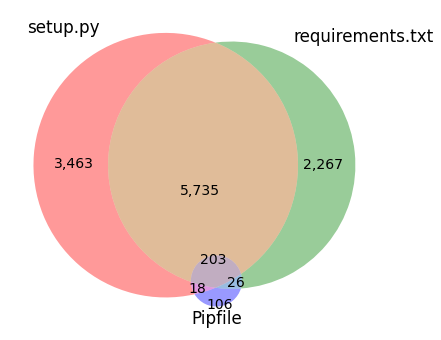

In [21]:
with savefig("notebook_dependencies_x3", 8, 6):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    venn = venn3(
        subsets={
            "111": setup_and_requirements_and_pipfile,
            "110": setup_and_requirements,
            "101": setup_and_pipfile,
            "100": setup,
            "011": requirements_and_pipfile,
            "010": requirements,
            "001": pipfiles,
        },
        set_labels=("setup.py", "requirements.txt", "Pipfile"),
        ax=ax,
    )
    for label in venn.subset_labels:
        if label:
            label.set_text("{0:,g}".format(int(label.get_text())))
    # ax.text(0, 0.6, "{0:,}".format(others))
    plt.plot()

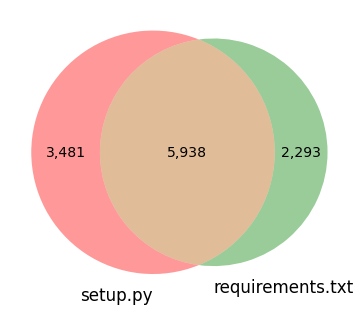

In [22]:
with savefig("notebook_dependencies_x2", 8, 6):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    venn = venn2(
        subsets={
            "11": setup_and_requirements + setup_and_requirements_and_pipfile,
            "10": setup + setup_and_pipfile,
            "01": requirements + requirements_and_pipfile,
        },
        set_labels=("setup.py", "requirements.txt"),
        ax=ax,
    )
    for label in venn.subset_labels:
        label.set_text("{0:,g}".format(int(label.get_text())))
    # ax.text(0, 0.6, "{0:,}".format(others + pipfiles))
    plt.subplots_adjust(top=0.8, right=0.8)
    plt.plot()

In [23]:
pipfile_total = (
    setup_and_requirements_and_pipfile
    + setup_and_pipfile
    + requirements_and_pipfile
    + pipfiles
)
dependencies = (
    setup_and_requirements_and_pipfile
    + setup_and_requirements
    + setup_and_pipfile
    + setup
    + requirements_and_pipfile
    + requirements
    + pipfiles
)

print(
    "Notebooks in repositories with Pipfile: {}".format(
        relative_var("notebooks_with_pipfile", pipfile_total, total_notebooks)
    )
)
print(
    "Notebooks in repositories with Declared Modules: {}".format(
        relative_var(
            "notebooks_with_dependencies", dependencies, dependencies + others
        ),
    )
)

Notebooks in repositories with Pipfile: 353 (1.29%)
Notebooks in repositories with Declared Modules: 11,818 (43.34%)
